In [287]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

In [288]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()
#for classification take Classes 
#for regression taking FWI as dependent and others as independent variable

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [289]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [290]:
#Data cleaning
df.isnull().sum()
#df.isnull().any(axis=1)
df[df.isnull().any(axis=1)]
df.loc[:122,"Region"]=0 #Bejaia region dataset
df.loc[122:,"Region"]=1 #Sidi-Bel Region
#df.info()
#deleting null rows(since only two)
df = df.dropna().reset_index(drop=True)
#df.isnull().sum()
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [291]:
#removing whitespces from column names
df.columns = df.columns.str.strip()
df.columns
#chnaging coloumn type
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]= df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int32(6), object(8)
memory usage: 22.9+ KB


In [292]:
#changing all other coloumns to float
m = [f for f in df.columns if df[f].dtypes=="O"]
for i in m:
    if i!='Classes':
        df[i]=df[i].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 22.9+ KB


Exploratory Data Analysis (EDA)

In [293]:
df_copy = df
df = df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [294]:
#encoding 
df['Classes'].value_counts()
df['Classes'] = np.where(df['Classes'].str.strip()=='not fire',0,1)
#use strip beacuse classes contins 'not fire' ' not fire' as separate grps
#df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


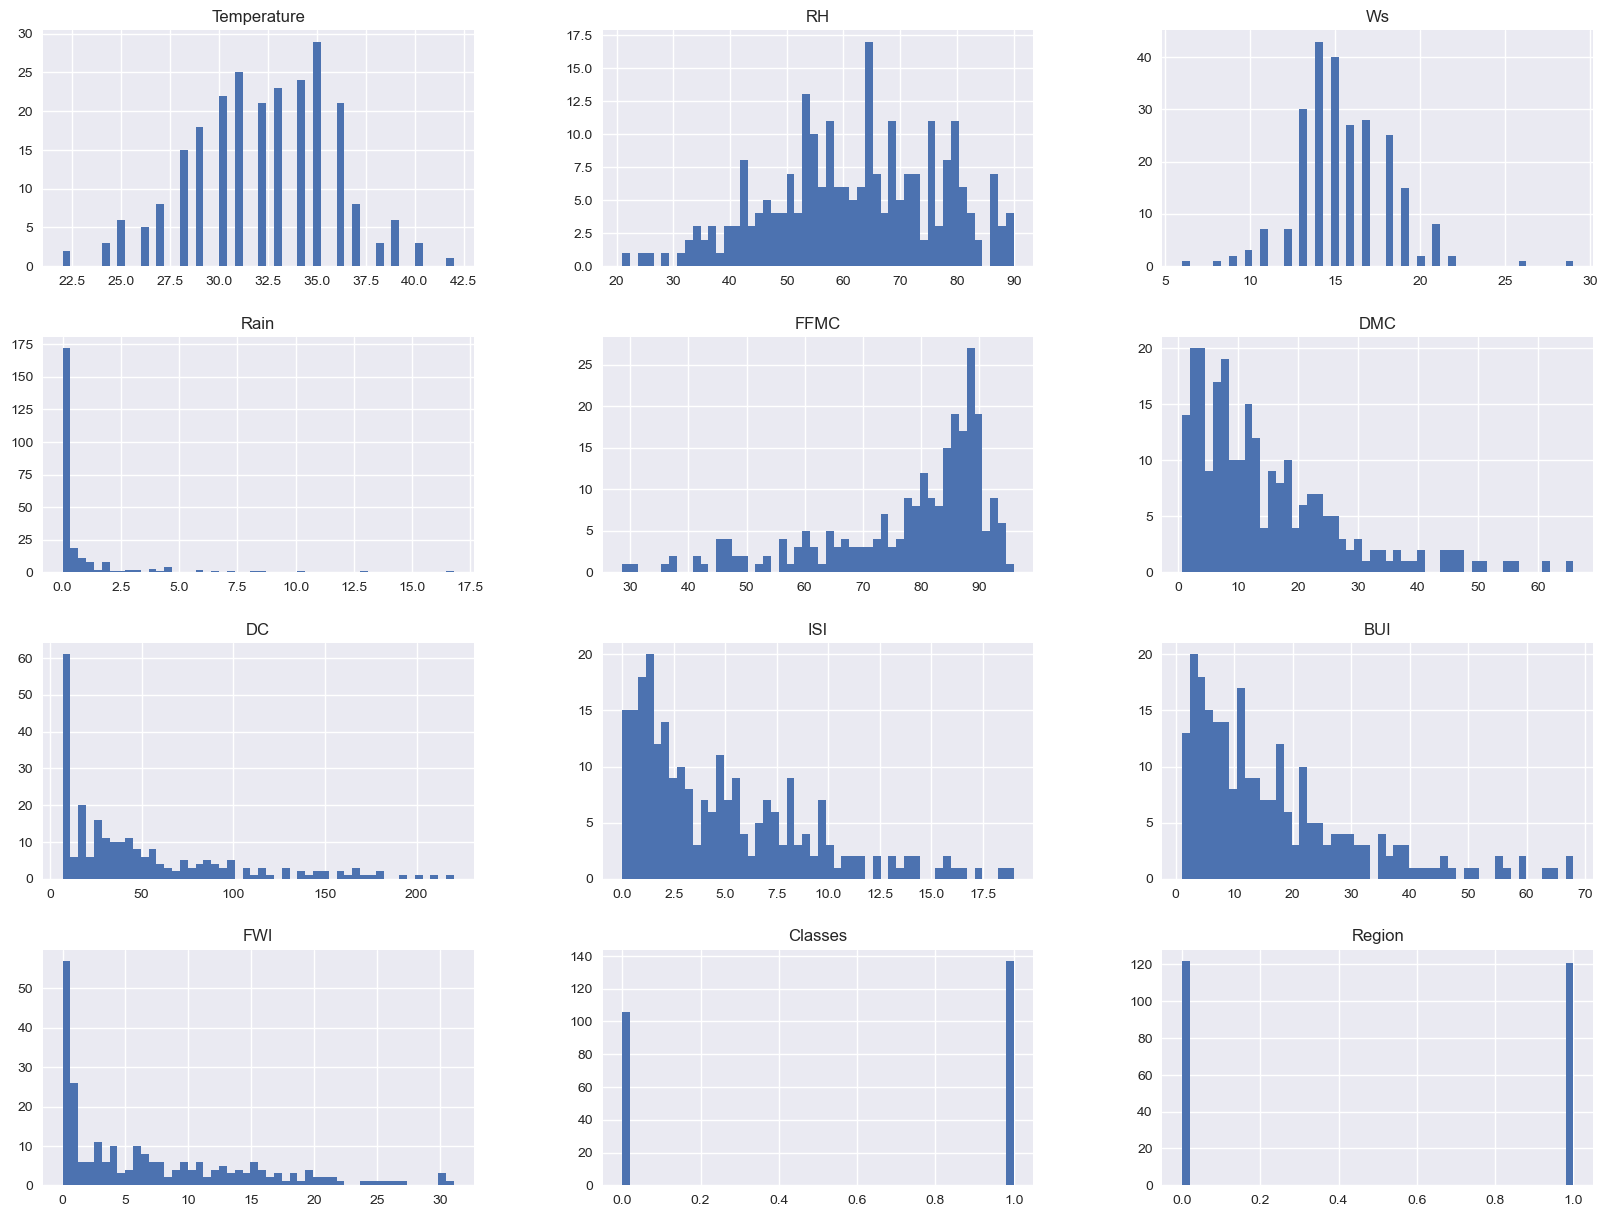

In [295]:
#plot histogram for all coloumns
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

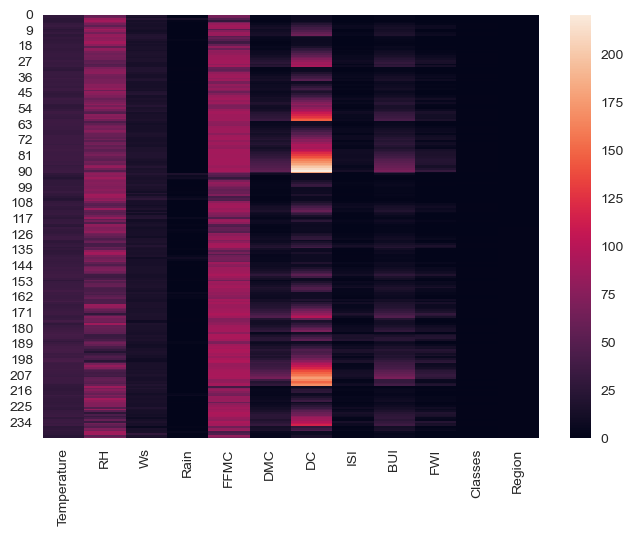

In [296]:
#print(df['Classes'].unique())
#print(df['Classes'].dtype)
# df['Classes'] = df['Classes'].astype(int)
#df.info()
df.corr()
sns.heatmap(df)
plt.show()

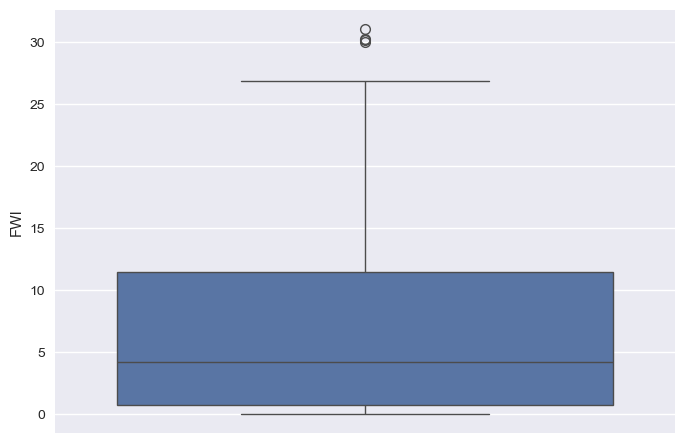

In [297]:
sns.boxplot(df['FWI'])
plt.show()

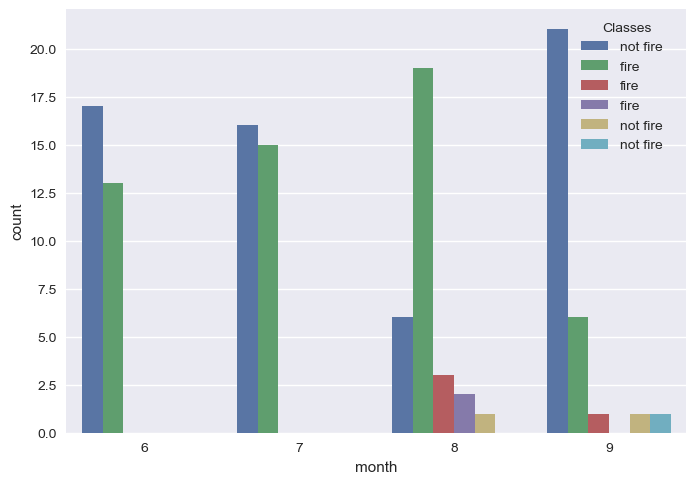

In [299]:
#Region wise mothwise distribution
df_temp_0 = df_copy.loc[df_copy["Region"]==0]
sns.countplot(x='month',hue="Classes",data=df_temp_0)
plt.show()

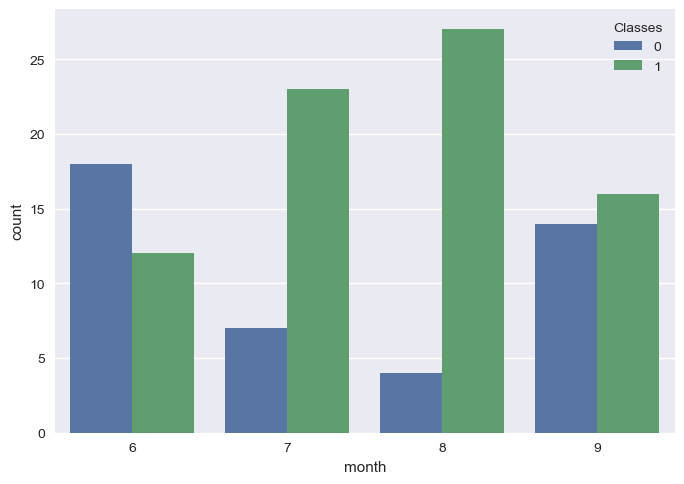

In [ ]:
df_temp_1 = df_copy.loc[df_copy["Region"]==1]
sns.countplot(x='month',hue="Classes",data=df_temp_1)
plt.show()
df = df
df.to_csv('Updated_Cleaned_Dataset.csv',index=False)

In [ ]:
#Feature selctiom
